In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tree=os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data')
for item in tree:
    print(item)

('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data', ['2020-12-05', '2020-12-08', '2020-12-09', '2020-12-04', '2020-12-06', '2020-12-03', '2020-12-07'], [])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05', ['Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Smirnov', 'Kirill_Smirnov', 'Alexey_Fedorov', 'Alexey_Petrov'], [])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov', [], ['data.csv'])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov', [], ['data.csv'])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov', [], ['data.csv'])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_minipr

In [6]:
tree = os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data')
data_files =[]
target_files = 'data.csv' 

#здесь мы ищем путь к файлам и папкам


for item in tree:
    files = item[-1]
    
#если папка сожержит файлы и первый фаил data.csv 

    if len(files) > 0 and target_files in files:
        path= os.path.join(item[0], target_files)
        data_files.append(path)
        
        
# Вызовем через переменную tree заново os.walk
# создадим переменную data_files, куда мы будем складывать все наши полученные файлы
# так же создаём переменную target_dile, где будем хранить название интересующего нас файла
# зададим цикл for в котором мы будем последовательно для каждого из элементов последовательности tree
# в переменную files мы выделим специально последний элемент из кортежа с помощью индексации [-1]
# далее мы говорим - если длинна списка файлов у нас БОЛЬШЕ < 0 и если в нашей папке есть целевой файл
# тоесть если среди элементов списка есть то значение, которое соответствует нашему data.scv 
# то необходимо сохранить наш путь 
# так же есть удобная функция os.path.join которая поможет скомбинировать кусочки которые нам необходимы,
# и она сама обработает необходимые данные, добавит слэши в нужные места и т.д.
# и в итоге с помощью метода append мы будем сохранять наш путь в data_files, который далее будем
# использовать для чтения данных

In [4]:
data_files

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Petr_Petrov/da

In [10]:
data_files_df = []

for path in data_files:
    df = pd.read_csv(path, index_col=0)
    date, name = path.split('/')[10:12]
    df['name']= name
    df['date']= date 
    data_files_df.append(df)
# создав новый список data_files_df, мы каждый раз будем сохранять новый список именно туда
# по всем своим путям мы будем итерироваться по циклу for и каждый верхний набор данных мы будем читать
# делать мы это будем при помощи read_csv указывая в качестве агрумента текущий путь path
# а так же посмотрев выше на данные, мы увидели что у нас есть колонка, которая отвечает
# за номер строки, по этому что бы избежать самовольного изменения датафрейма добавляем index_col = 0
# далее из всегог пути нам необходимо выделить дату и имя в данном случае мы будем использовать
# строковые методы .split который позволяет разделить строку по тому, что мы передадим в качестве аргумента ('/')
# и если мы посмотрим на наш путь, то чётко увидим что наш путь можно разделить по data/2020-12-08/alexey итд
# тоесть наша строка превратиться в список из четырёх элементов, далее мы обращаемся к срезу и берём из списка
# все элементы с первого по второй включительно [10:12] последний индекс что передаётся в квадратные скобки
# не используется в работе
# тем самым мы вырезали 2 элемента из списка. первый из них уйдёт в date, а второй в name
# далее мы создадим новые колонки в датафрейме что мы считали и назовём их name и date
# и эти значения мы сохраним методом append в тот файл, который сейчас хранится в df

In [12]:
data_files_df[0].head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


In [13]:
data=pd.concat(data_files_df, ignore_index=False)

In [15]:
data.head(10)

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
0,55,3,Petr_Smirnov,2020-12-05
1,49,3,Petr_Smirnov,2020-12-05
2,22,5,Petr_Smirnov,2020-12-05
3,83,4,Petr_Smirnov,2020-12-05
0,66,2,Rostislav_Smirnov,2020-12-05


In [17]:
data['quantity'].sum()

480

In [26]:
quantitiy_blok=data.groupby('name')\
                .quantity.sum()
quantitiy_blok

name
Alexey_Fedorov       24
Alexey_Ivanov        17
Alexey_Petrov         7
Alexey_Smirnov       52
Anton_Ivanov         23
Anton_Petrov         18
Anton_Smirnov        45
Kirill_Fedorov       28
Kirill_Petrov         9
Kirill_Smirnov       17
Petr_Fedorov         34
Petr_Ivanov          21
Petr_Petrov          14
Petr_Smirnov         52
Rostislav_Fedorov    16
Rostislav_Ivanov      9
Rostislav_Petrov     28
Rostislav_Smirnov    17
Vasiliy_Fedorov      15
Vasiliy_Ivanov       27
Vasiliy_Petrov        7
Name: quantity, dtype: int64

In [27]:
quantitiy_blok.max()

52

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

по оси x – идентификаторы товаров (product_id) 
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56

- **Как делать это задание?**
    
    Сгруппируйте данные по товарам (`product_id`) и посчитайте для каждого товара сумму по числу заказов (`quantity`). Для визуализации используйте `sns.barplot`
    
- **Как считать сумму?**
    
    Используйте метод `sum` в агрегации
    
- **Построение барплота**
    
    Для построения нужного графика импортируйте `seaborn` и вызовите `sns.barplot`, указав там нужные x и y. Например,
    
    ```python
    sns.barplot(x=df.col_x, y=df.col_y)
    ```
    
    построит график с соответствующими координатами x и y из колонок `col_x` и `col_y` для столбиков.
    
    Альтернативно можно указать в x и y только названия нужных колонок в кавычках, а также передать в `data` переменную с датафрэймом
    
    ```python
    sns.barplot(x='col_x', y='col_y', data=df)
    ```
    
- **Как указать цвет и другие методы?**
    
    Чтобы указать эти параметры, введите их в функции `sns.barplot`. Формат можно посмотреть в документации или разборе

In [94]:
produkt_som=data.groupby('product_id', as_index=False).quantity.sum()

In [97]:
produkt_som = produkt_som.sort_values('quantity', ascending=False).head(10)

In [98]:
produkt_som

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


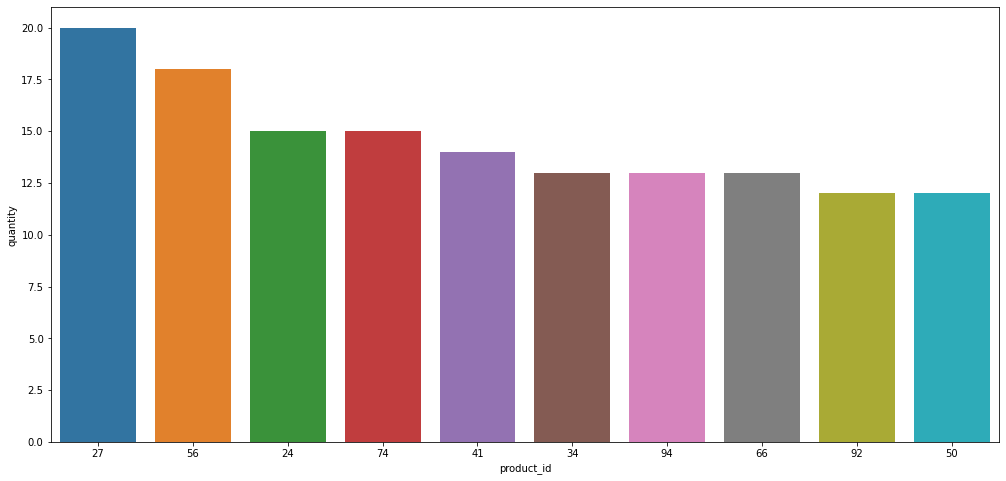

In [109]:
fig, ax = plt.subplots(figsize=(17,8))
sns.barplot(data=produkt_som.head(10) , x='product_id', y='quantity', 
           order=produkt_som.sort_values('quantity', ascending=False).product_id, ax=ax)


# теперь наша задача в том, что бы визуализировать сколько было продано товаров по нашим product_id
# первым делом создадим параметры отображения фигуры задав fig - фигура, 
# ax - переменная plt.subplots(Параметр фигуры(размеры))
# из библиотеки seaborn мы будем использовать barplot в который передадим данные sns.barplot(файл=датафрейм).head(10)
# где x-колонка 'product_id' где y - колонка 'quantity'
# так же для красоты мы отсортируем отображение по колличеству 
# проданных элементов order=переменная.сортировкаПО('колонке quantity').колонке product_id 
# так же пропишем что хотим рисовать график на осях которые хранятся в обЪекте ax прописав ax=ax

In [106]:
produkt_som.loc[produkt_som.product_id == 56]

,product_id,quantity
42,56,18


Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date). Далее выберите верные утверждения:

- **Как делать это задание?**
    
    Сгруппируйте данные по датам (`date`) и посчитайте для каждого дня сумму по числу заказов (`quantity`). Для визуализации используйте `sns.barplot`
    
- **Как считать сумму?**
    
    Используйте метод `sum` в агрегации
    
- **У меня получается, что всё купили в один день**
    
    Проверьте, что вы правильно добавляли даты во временные датафрэймы в первом задании. Возможно вы взяли дату только один раз на все файлы, либо задали её только один раз
    
- **Построение барплота**
    
    Для построения нужного графика импортируйте `seaborn` и вызовите `sns.barplot`, указав там нужные x и y. Например,
    
    ```python
    sns.barplot(x=df.col_x, y=df.col_y)
    ```
    
    построит график с соответствующими координатами x и y из колонок `col_x` и `col_y` для столбиков.
    
    Альтернативно можно указать в x и y только названия нужных колонок в кавычках, а также передать в `data` переменную с датафрэймом

In [112]:
products_per_day = data.groupby('date', as_index=False).quantity.sum()

In [113]:
products_per_day

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


Text(0.5, 1.0, 'Покупки по дням')

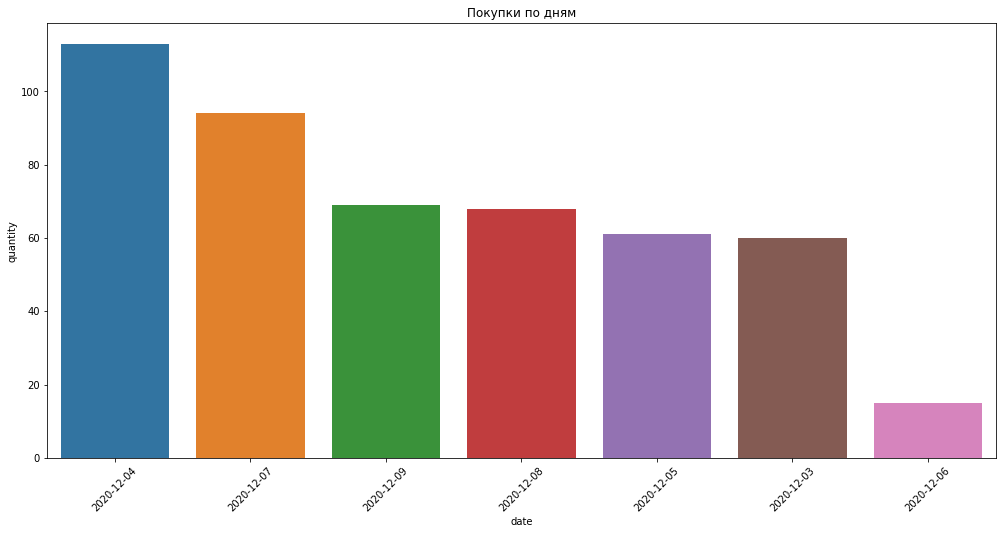

In [117]:
fig, ax = plt.subplots(figsize=(17,8))
sns.barplot(data=products_per_day.head(10) , x='date', y='quantity', 
           order=products_per_day.sort_values('quantity', ascending=False).date, ax=ax)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Покупки по дням')

💀 Сложное задание! 💀

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.
    

product_id quantity name              date
25         2        Katya Skriptsova  2020-12-05
54         1        Olya Silyutina    2020-12-05    
7          4        Katya Skriptsova  2020-12-05  
6          4        Sasha Tsarev      2020-12-06
6          1        Sasha Tsarev      2020-12-06
7          5        Katya Skriptsova  2020-12-06  
Может пригодиться: .drop_duplicates()

- **Как решать это задание?**
    
    Один из вариантов решения - удалить дубликаты по имени, продукту и дате. Это оставит только по одной строке на каждую покупку продукта в день. Затем нужно сгруппировать по колонкам `name` и `product_id` и посчитать число дней покупок каждого продукта для каждого человека (то есть число строк в группе). После этого отберите строки со значением больше 1, то есть только строки пользователей, купивших что-то в разные дни
    
- **Удаление дубликатов**
    
    Для удаления повторяющихся строк используется метод `drop_duplicates`. Под повторяющимися имеется в виду, что значения в этих строках во всех их колонках одинаковые
    
- **И как же их удалять?**
    
    Вызов вида
    
    ```python
    df.drop_duplicates()
    ```
    
    вернёт датафрэйм, где не будет повторяющихся строк. Чтобы смотреть на повторность не по всем столбцам, а только по части, воспользуйтесь параметром `subset`
    
    ```python
    df.drop_duplicates(subset='my_unique_column')
    ```
    
    вернёт датафрэйм, где не будет строк с одинаковым значением в колонке `my_unique_column`

In [118]:
duble_2=data.drop_duplicates(['product_id', 'name', 'date'])

In [120]:
duble=data.drop_duplicates(subset=['product_id', 'name', 'date'])

In [121]:
duble.head(5)

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
